In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler, RobustScaler

#### Isolation Forest

In [24]:
df = pd.read_csv('cicds_isolation2.csv')

In [25]:
df

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0.000342,1.325003e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.550885,6.333348e-07,0.000000,0.000716,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000342,2.025005e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.934711,6.750016e-07,0.000000,0.000716,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000342,1.416670e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48453,0.001245,6.269024e-03,0.000417,0.000573,0.000453,0.000042,0.003829,0.0,0.005143,0.007680,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48454,0.001245,7.992727e-07,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48455,0.001245,3.235632e-03,0.000215,0.000469,0.000234,0.000022,0.001976,0.0,0.002654,0.003963,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48456,0.001245,1.341274e-03,0.000089,0.000404,0.000097,0.000009,0.000819,0.0,0.001100,0.001642,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [26]:
X = df.drop('Label', axis=1)
y = df['Label']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((38766, 78), (38766,))

### Apply ML

In [28]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [29]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=100)
knneig.fit(X_train, y_train)
predict(knneig,X_train,y_train,X_test,y_test)
print(classification_report(y_test, knneig.predict(X_test)))

Training Accuracy: 99.55
Testing  Accuracy: 99.59
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4413
           1       0.99      1.00      1.00      5279

    accuracy                           1.00      9692
   macro avg       1.00      1.00      1.00      9692
weighted avg       1.00      1.00      1.00      9692



In [12]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 42)
predict(rf,X_train,y_train,X_test,y_test)
print(classification_report(y_test, rf.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17976
           1       1.00      1.00      1.00     23186

    accuracy                           1.00     41162
   macro avg       1.00      1.00      1.00     41162
weighted avg       1.00      1.00      1.00     41162



In [30]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy: 98.41
Testing  Accuracy: 98.52
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4413
           1       0.97      1.00      0.99      5279

    accuracy                           0.99      9692
   macro avg       0.99      0.98      0.99      9692
weighted avg       0.99      0.99      0.99      9692



In [14]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, gbc.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 99.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17976
           1       1.00      1.00      1.00     23186

    accuracy                           1.00     41162
   macro avg       1.00      1.00      1.00     41162
weighted avg       1.00      1.00      1.00     41162



In [15]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_train,y_train,X_test,y_test)
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17976
           1       1.00      1.00      1.00     23186

    accuracy                           1.00     41162
   macro avg       1.00      1.00      1.00     41162
weighted avg       1.00      1.00      1.00     41162



In [37]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_train,y_train,X_test,y_test)
print(classification_report(y_test, nb.predict(X_test)))

Training Accuracy: 98.88
Testing  Accuracy: 98.94
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4413
           1       0.98      1.00      0.99      5279

    accuracy                           0.99      9692
   macro avg       0.99      0.99      0.99      9692
weighted avg       0.99      0.99      0.99      9692



In [17]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_train,y_train,X_test,y_test)
print(classification_report(y_test, xg.predict(X_test)))

C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17976
           1       1.00      1.00      1.00     23186

    accuracy                           1.00     41162
   macro avg       1.00      1.00      1.00     41162
weighted avg       1.00      1.00      1.00     41162



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [32]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)  
predict(mlp,X_train,y_train,X_test,y_test)
print(classification_report(y_test, mlp.predict(X_test)))

Training Accuracy: 99.88
Testing  Accuracy: 99.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4413
           1       1.00      1.00      1.00      5279

    accuracy                           1.00      9692
   macro avg       1.00      1.00      1.00      9692
weighted avg       1.00      1.00      1.00      9692



In [33]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, svc.predict(X_test)))

Training Accuracy: 98.99
Testing  Accuracy: 99.05
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4413
           1       0.98      1.00      0.99      5279

    accuracy                           0.99      9692
   macro avg       0.99      0.99      0.99      9692
weighted avg       0.99      0.99      0.99      9692



In [34]:
r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]
LR_probs = LR_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]
mlp_probs = mlp_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

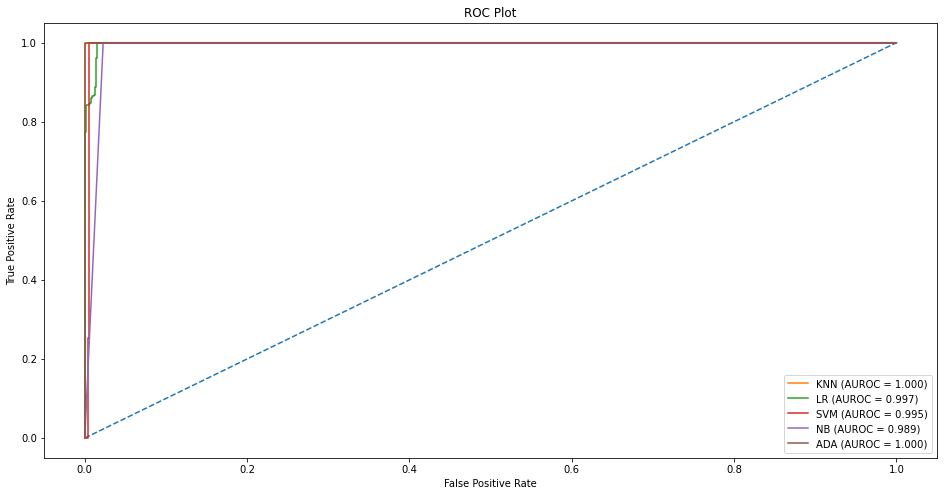

In [36]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(svc_fpr, svc_tpr, label='SVM (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_tpr, label='NB (AUROC = %0.3f)' % nb_auc)
plt.plot(mlp_fpr, mlp_tpr, label='ADA (AUROC = %0.3f)' % mlp_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [24]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (78,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                5056      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 13,505
Trainable params: 13,505
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_train,y_train,epochs=50,batch_size=60)

Epoch 1/50
2745/2745 [==============================] - 1s 508us/step - loss: 0.0320 - accuracy: 0.9921
Epoch 2/50
2745/2745 [==============================] - 1s 480us/step - loss: 0.0047 - accuracy: 0.9990
Epoch 3/50
2745/2745 [==============================] - 1s 464us/step - loss: 0.0037 - accuracy: 0.9992
Epoch 4/50
2745/2745 [==============================] - 1s 467us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 5/50
2745/2745 [==============================] - 1s 473us/step - loss: 0.0027 - accuracy: 0.9994
Epoch 6/50
2745/2745 [==============================] - 1s 459us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 7/50
2745/2745 [==============================] - 1s 467us/step - loss: 0.0023 - accuracy: 0.9995
Epoch 8/50
2745/2745 [==============================] - 1s 469us/step - loss: 0.0023 - accuracy: 0.9995
Epoch 9/50
2745/2745 [==============================] - 1s 457us/step - loss: 0.0021 - accuracy: 0.9994
Epoch 10/50
2745/2745 [==============================] - 1s 465u

In [26]:
y_pred=model.predict(X_test)
y_pred = (y_pred>0.5)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17976
           1       1.00      1.00      1.00     23186

    accuracy                           1.00     41162
   macro avg       1.00      1.00      1.00     41162
weighted avg       1.00      1.00      1.00     41162



Text(0.5, 1.0, 'Loss and Accuracy plot')

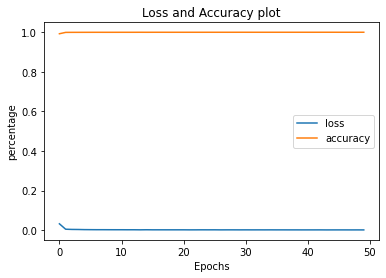

In [27]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

### KMeans

In [14]:
df = pd.read_csv('cicids_kmeans2.csv')

In [15]:
df

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0.000342,1.055287e-02,0.022247,0.015759,0.011466,0.001370,0.032737,0.0,0.019038,0.031022,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000342,1.099463e-02,0.022247,0.015759,0.011466,0.001370,0.032737,0.0,0.019038,0.031022,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000342,1.325003e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000342,1.086242e-02,0.022247,0.015043,0.011741,0.001307,0.032737,0.0,0.019495,0.031097,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.550885,6.333348e-07,0.000000,0.000716,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48992,0.001245,6.269024e-03,0.000417,0.000573,0.000453,0.000042,0.003829,0.0,0.005143,0.007680,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48993,0.001245,7.992727e-07,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48994,0.001245,3.235632e-03,0.000215,0.000469,0.000234,0.000022,0.001976,0.0,0.002654,0.003963,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48995,0.001245,1.341274e-03,0.000089,0.000404,0.000097,0.000009,0.000819,0.0,0.001100,0.001642,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
X = df.drop('Label', axis=1)
y = df['Label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((39197, 78), (39197,))

### Apply ML

In [18]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [19]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=1)
knneig.fit(X_train, y_train)
predict(knneig,X_train,y_train,X_test,y_test)
print(classification_report(y_test, knneig.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4679
           1       1.00      1.00      1.00      5121

    accuracy                           1.00      9800
   macro avg       1.00      1.00      1.00      9800
weighted avg       1.00      1.00      1.00      9800



In [35]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 42)
predict(rf,X_train,y_train,X_test,y_test)
print(classification_report(y_test, rf.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19647
           1       1.00      1.00      1.00     21069

    accuracy                           1.00     40716
   macro avg       1.00      1.00      1.00     40716
weighted avg       1.00      1.00      1.00     40716



In [20]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy: 98.46
Testing  Accuracy: 98.39
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4679
           1       0.97      1.00      0.98      5121

    accuracy                           0.98      9800
   macro avg       0.99      0.98      0.98      9800
weighted avg       0.98      0.98      0.98      9800



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, gbc.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 99.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19647
           1       1.00      1.00      1.00     21069

    accuracy                           1.00     40716
   macro avg       1.00      1.00      1.00     40716
weighted avg       1.00      1.00      1.00     40716



In [38]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_train,y_train,X_test,y_test)
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19647
           1       1.00      1.00      1.00     21069

    accuracy                           1.00     40716
   macro avg       1.00      1.00      1.00     40716
weighted avg       1.00      1.00      1.00     40716



In [21]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_train,y_train,X_test,y_test)
print(classification_report(y_test, nb.predict(X_test)))

Training Accuracy: 98.87
Testing  Accuracy: 98.83
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4679
           1       0.98      1.00      0.99      5121

    accuracy                           0.99      9800
   macro avg       0.99      0.99      0.99      9800
weighted avg       0.99      0.99      0.99      9800



In [40]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_train,y_train,X_test,y_test)
print(classification_report(y_test, xg.predict(X_test)))

C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19647
           1       1.00      1.00      1.00     21069

    accuracy                           1.00     40716
   macro avg       1.00      1.00      1.00     40716
weighted avg       1.00      1.00      1.00     40716



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [22]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)  
predict(mlp,X_train,y_train,X_test,y_test)
print(classification_report(y_test, mlp.predict(X_test)))

Training Accuracy: 99.85
Testing  Accuracy: 99.81
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4679
           1       1.00      1.00      1.00      5121

    accuracy                           1.00      9800
   macro avg       1.00      1.00      1.00      9800
weighted avg       1.00      1.00      1.00      9800



In [23]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, svc.predict(X_test)))

Training Accuracy: 99.02
Testing  Accuracy: 99.03
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4679
           1       0.98      1.00      0.99      5121

    accuracy                           0.99      9800
   macro avg       0.99      0.99      0.99      9800
weighted avg       0.99      0.99      0.99      9800



In [43]:
r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(X_test)
RF_probs = rf.predict_proba(X_test)
GBC_probs = gbc.predict_proba(X_test)
ADA_probs = ada.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]
RF_probs = RF_probs[:, 1]
GBC_probs = GBC_probs[:, 1]
LR_probs = LR_probs[:, 1]
ADA_probs = ADA_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
GBC_auc = roc_auc_score(y_test, GBC_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
ADA_auc = roc_auc_score(y_test, ADA_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
GBC_fpr, GBC_tpr, _ = roc_curve(y_test, GBC_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
ADA_fpr, ADA_tpr, _ = roc_curve(y_test, ADA_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

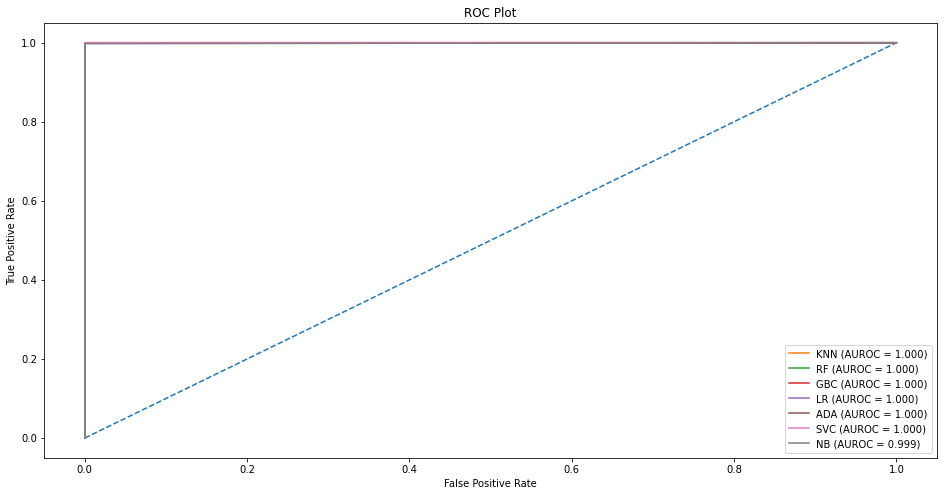

In [44]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(RF_fpr, RF_tpr, label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(GBC_fpr, GBC_tpr, label='GBC (AUROC = %0.3f)' % GBC_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(ADA_fpr, ADA_tpr, label='ADA (AUROC = %0.3f)' % ADA_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_tpr, label='NB (AUROC = %0.3f)' % nb_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [45]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (78,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                5056      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 13,505
Trainable params: 13,505
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_train,y_train,epochs=50,batch_size=60)

Epoch 1/50
2715/2715 [==============================] - 1s 479us/step - loss: 0.0148 - accuracy: 0.9981
Epoch 2/50
2715/2715 [==============================] - 1s 480us/step - loss: 0.0036 - accuracy: 0.9995
Epoch 3/50
2715/2715 [==============================] - 1s 472us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 4/50
2715/2715 [==============================] - 1s 475us/step - loss: 0.0016 - accuracy: 0.9997
Epoch 5/50
2715/2715 [==============================] - 1s 483us/step - loss: 0.0018 - accuracy: 0.9998
Epoch 6/50
2715/2715 [==============================] - 1s 465us/step - loss: 0.0012 - accuracy: 0.9998
Epoch 7/50
2715/2715 [==============================] - 1s 462us/step - loss: 0.0011 - accuracy: 0.9999
Epoch 8/50
2715/2715 [==============================] - 1s 464us/step - loss: 0.0014 - accuracy: 0.9998
Epoch 9/50
2715/2715 [==============================] - 1s 462us/step - loss: 0.0010 - accuracy: 0.9999
Epoch 10/50
2715/2715 [==============================] - 1s 463u

In [47]:
y_pred=model.predict(X_test)
y_pred = (y_pred>0.5)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19647
           1       1.00      1.00      1.00     21069

    accuracy                           1.00     40716
   macro avg       1.00      1.00      1.00     40716
weighted avg       1.00      1.00      1.00     40716



Text(0.5, 1.0, 'Loss and Accuracy plot')

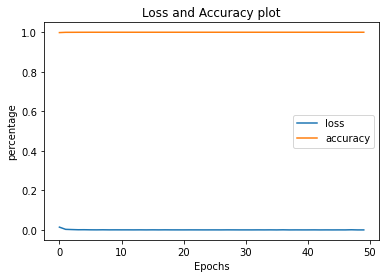

In [48]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

## DBScan

In [3]:
df = pd.read_csv("cicids_dbscan2.csv")

In [4]:
df

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0.000342,1.325003e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000342,2.025005e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000342,1.089368e-02,0.022247,0.014327,0.011741,0.001307,0.032737,0.0,0.019495,0.031097,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000342,1.416670e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000342,1.741671e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45449,0.001245,6.269024e-03,0.000417,0.000573,0.000453,0.000042,0.003829,0.0,0.005143,0.007680,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
45450,0.001245,7.992727e-07,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
45451,0.001245,3.235632e-03,0.000215,0.000469,0.000234,0.000022,0.001976,0.0,0.002654,0.003963,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
45452,0.001245,1.341274e-03,0.000089,0.000404,0.000097,0.000009,0.000819,0.0,0.001100,0.001642,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [6]:
X = df.drop('Label', axis=1)
y = df['abel']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((36363, 78), (36363,))

### Apply ML

In [8]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [9]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=100)
knneig.fit(X_train, y_train)
predict(knneig,X_train,y_train,X_test,y_test)
print(classification_report(y_test, knneig.predict(X_test)))

Training Accuracy: 99.75
Testing  Accuracy: 99.76
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3775
           1       1.00      1.00      1.00      5316

    accuracy                           1.00      9091
   macro avg       1.00      1.00      1.00      9091
weighted avg       1.00      1.00      1.00      9091



In [10]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy: 98.84
Testing  Accuracy: 98.87
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3775
           1       0.98      1.00      0.99      5316

    accuracy                           0.99      9091
   macro avg       0.99      0.99      0.99      9091
weighted avg       0.99      0.99      0.99      9091



In [11]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_train,y_train,X_test,y_test)
print(classification_report(y_test, nb.predict(X_test)))

Training Accuracy: 99.02
Testing  Accuracy: 99.26
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3775
           1       0.99      1.00      0.99      5316

    accuracy                           0.99      9091
   macro avg       0.99      0.99      0.99      9091
weighted avg       0.99      0.99      0.99      9091



In [12]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)  
predict(mlp,X_train,y_train,X_test,y_test)
print(classification_report(y_test, mlp.predict(X_test)))

Training Accuracy: 99.83
Testing  Accuracy: 99.84
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3775
           1       1.00      1.00      1.00      5316

    accuracy                           1.00      9091
   macro avg       1.00      1.00      1.00      9091
weighted avg       1.00      1.00      1.00      9091



In [13]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, svc.predict(X_test)))

Training Accuracy: 99.14
Testing  Accuracy: 99.1
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3775
           1       0.98      1.00      0.99      5316

    accuracy                           0.99      9091
   macro avg       0.99      0.99      0.99      9091
weighted avg       0.99      0.99      0.99      9091

